In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
X = df_cancer.iloc[:,[0,1]]
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [6]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

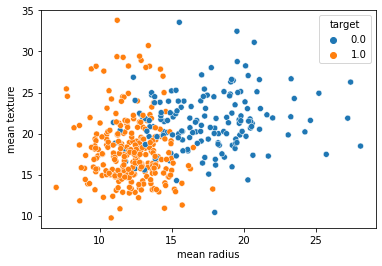

In [7]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [8]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

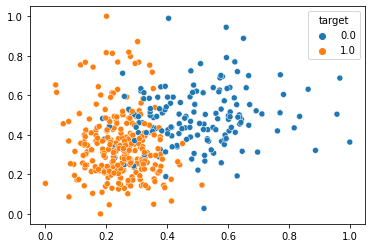

In [9]:

sns.scatterplot(X_train_scaled[:,0], X_train_scaled[:,1], hue=y_train)

In [10]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)



Epoch 1/500
14/14 - 0s - loss: 0.7079 - 318ms/epoch - 23ms/step
Epoch 2/500
14/14 - 0s - loss: 0.7049 - 18ms/epoch - 1ms/step
Epoch 3/500
14/14 - 0s - loss: 0.7019 - 34ms/epoch - 2ms/step
Epoch 4/500
14/14 - 0s - loss: 0.6991 - 32ms/epoch - 2ms/step
Epoch 5/500
14/14 - 0s - loss: 0.6963 - 26ms/epoch - 2ms/step
Epoch 6/500
14/14 - 0s - loss: 0.6938 - 24ms/epoch - 2ms/step
Epoch 7/500
14/14 - 0s - loss: 0.6912 - 41ms/epoch - 3ms/step
Epoch 8/500
14/14 - 0s - loss: 0.6888 - 26ms/epoch - 2ms/step
Epoch 9/500
14/14 - 0s - loss: 0.6867 - 16ms/epoch - 1ms/step
Epoch 10/500
14/14 - 0s - loss: 0.6846 - 23ms/epoch - 2ms/step
Epoch 11/500
14/14 - 0s - loss: 0.6826 - 22ms/epoch - 2ms/step
Epoch 12/500
14/14 - 0s - loss: 0.6807 - 18ms/epoch - 1ms/step
Epoch 13/500
14/14 - 0s - loss: 0.6788 - 24ms/epoch - 2ms/step
Epoch 14/500
14/14 - 0s - loss: 0.6769 - 21ms/epoch - 1ms/step
Epoch 15/500
14/14 - 0s - loss: 0.6752 - 13ms/epoch - 928us/step
Epoch 16/500
14/14 - 0s - loss: 0.6734 - 22ms/epoch - 2ms/st

Epoch 131/500
14/14 - 0s - loss: 0.5783 - 18ms/epoch - 1ms/step
Epoch 132/500
14/14 - 0s - loss: 0.5776 - 22ms/epoch - 2ms/step
Epoch 133/500
14/14 - 0s - loss: 0.5770 - 17ms/epoch - 1ms/step
Epoch 134/500
14/14 - 0s - loss: 0.5764 - 18ms/epoch - 1ms/step
Epoch 135/500
14/14 - 0s - loss: 0.5758 - 18ms/epoch - 1ms/step
Epoch 136/500
14/14 - 0s - loss: 0.5752 - 18ms/epoch - 1ms/step
Epoch 137/500
14/14 - 0s - loss: 0.5746 - 17ms/epoch - 1ms/step
Epoch 138/500
14/14 - 0s - loss: 0.5740 - 17ms/epoch - 1ms/step
Epoch 139/500
14/14 - 0s - loss: 0.5734 - 18ms/epoch - 1ms/step
Epoch 140/500
14/14 - 0s - loss: 0.5728 - 18ms/epoch - 1ms/step
Epoch 141/500
14/14 - 0s - loss: 0.5721 - 17ms/epoch - 1ms/step
Epoch 142/500
14/14 - 0s - loss: 0.5715 - 17ms/epoch - 1ms/step
Epoch 143/500
14/14 - 0s - loss: 0.5709 - 17ms/epoch - 1ms/step
Epoch 144/500
14/14 - 0s - loss: 0.5704 - 16ms/epoch - 1ms/step
Epoch 145/500
14/14 - 0s - loss: 0.5697 - 15ms/epoch - 1ms/step
Epoch 146/500
14/14 - 0s - loss: 0.5691 

Epoch 259/500
14/14 - 0s - loss: 0.5103 - 17ms/epoch - 1ms/step
Epoch 260/500
14/14 - 0s - loss: 0.5098 - 20ms/epoch - 1ms/step
Epoch 261/500
14/14 - 0s - loss: 0.5094 - 19ms/epoch - 1ms/step
Epoch 262/500
14/14 - 0s - loss: 0.5090 - 16ms/epoch - 1ms/step
Epoch 263/500
14/14 - 0s - loss: 0.5085 - 16ms/epoch - 1ms/step
Epoch 264/500
14/14 - 0s - loss: 0.5081 - 17ms/epoch - 1ms/step
Epoch 265/500
14/14 - 0s - loss: 0.5076 - 16ms/epoch - 1ms/step
Epoch 266/500
14/14 - 0s - loss: 0.5072 - 16ms/epoch - 1ms/step
Epoch 267/500
14/14 - 0s - loss: 0.5067 - 16ms/epoch - 1ms/step
Epoch 268/500
14/14 - 0s - loss: 0.5063 - 18ms/epoch - 1ms/step
Epoch 269/500
14/14 - 0s - loss: 0.5058 - 14ms/epoch - 999us/step
Epoch 270/500
14/14 - 0s - loss: 0.5054 - 14ms/epoch - 999us/step
Epoch 271/500
14/14 - 0s - loss: 0.5050 - 20ms/epoch - 1ms/step
Epoch 272/500
14/14 - 0s - loss: 0.5046 - 22ms/epoch - 2ms/step
Epoch 273/500
14/14 - 0s - loss: 0.5041 - 27ms/epoch - 2ms/step
Epoch 274/500
14/14 - 0s - loss: 0.5

Epoch 387/500
14/14 - 0s - loss: 0.4598 - 17ms/epoch - 1ms/step
Epoch 388/500
14/14 - 0s - loss: 0.4595 - 17ms/epoch - 1ms/step
Epoch 389/500
14/14 - 0s - loss: 0.4591 - 15ms/epoch - 1ms/step
Epoch 390/500
14/14 - 0s - loss: 0.4588 - 15ms/epoch - 1ms/step
Epoch 391/500
14/14 - 0s - loss: 0.4584 - 15ms/epoch - 1ms/step
Epoch 392/500
14/14 - 0s - loss: 0.4581 - 15ms/epoch - 1ms/step
Epoch 393/500
14/14 - 0s - loss: 0.4577 - 15ms/epoch - 1ms/step
Epoch 394/500
14/14 - 0s - loss: 0.4574 - 15ms/epoch - 1ms/step
Epoch 395/500
14/14 - 0s - loss: 0.4570 - 16ms/epoch - 1ms/step
Epoch 396/500
14/14 - 0s - loss: 0.4568 - 16ms/epoch - 1ms/step
Epoch 397/500
14/14 - 0s - loss: 0.4564 - 16ms/epoch - 1ms/step
Epoch 398/500
14/14 - 0s - loss: 0.4561 - 17ms/epoch - 1ms/step
Epoch 399/500
14/14 - 0s - loss: 0.4557 - 18ms/epoch - 1ms/step
Epoch 400/500
14/14 - 0s - loss: 0.4553 - 17ms/epoch - 1ms/step
Epoch 401/500
14/14 - 0s - loss: 0.4550 - 17ms/epoch - 1ms/step
Epoch 402/500
14/14 - 0s - loss: 0.4547 

In [11]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)


Epoch 1/500
14/14 - 0s - loss: 0.6845 - 343ms/epoch - 24ms/step
Epoch 2/500
14/14 - 0s - loss: 0.6759 - 25ms/epoch - 2ms/step
Epoch 3/500
14/14 - 0s - loss: 0.6664 - 28ms/epoch - 2ms/step
Epoch 4/500
14/14 - 0s - loss: 0.6572 - 26ms/epoch - 2ms/step
Epoch 5/500
14/14 - 0s - loss: 0.6474 - 23ms/epoch - 2ms/step
Epoch 6/500
14/14 - 0s - loss: 0.6371 - 27ms/epoch - 2ms/step
Epoch 7/500
14/14 - 0s - loss: 0.6261 - 16ms/epoch - 1ms/step
Epoch 8/500
14/14 - 0s - loss: 0.6139 - 24ms/epoch - 2ms/step
Epoch 9/500
14/14 - 0s - loss: 0.6006 - 23ms/epoch - 2ms/step
Epoch 10/500
14/14 - 0s - loss: 0.5858 - 17ms/epoch - 1ms/step
Epoch 11/500
14/14 - 0s - loss: 0.5695 - 23ms/epoch - 2ms/step
Epoch 12/500
14/14 - 0s - loss: 0.5520 - 24ms/epoch - 2ms/step
Epoch 13/500
14/14 - 0s - loss: 0.5336 - 26ms/epoch - 2ms/step
Epoch 14/500
14/14 - 0s - loss: 0.5147 - 27ms/epoch - 2ms/step
Epoch 15/500
14/14 - 0s - loss: 0.4953 - 22ms/epoch - 2ms/step
Epoch 16/500
14/14 - 0s - loss: 0.4756 - 29ms/epoch - 2ms/step

Epoch 131/500
14/14 - 0s - loss: 0.2677 - 22ms/epoch - 2ms/step
Epoch 132/500
14/14 - 0s - loss: 0.2703 - 21ms/epoch - 1ms/step
Epoch 133/500
14/14 - 0s - loss: 0.2674 - 40ms/epoch - 3ms/step
Epoch 134/500
14/14 - 0s - loss: 0.2666 - 33ms/epoch - 2ms/step
Epoch 135/500
14/14 - 0s - loss: 0.2685 - 26ms/epoch - 2ms/step
Epoch 136/500
14/14 - 0s - loss: 0.2666 - 30ms/epoch - 2ms/step
Epoch 137/500
14/14 - 0s - loss: 0.2680 - 27ms/epoch - 2ms/step
Epoch 138/500
14/14 - 0s - loss: 0.2671 - 50ms/epoch - 4ms/step
Epoch 139/500
14/14 - 0s - loss: 0.2667 - 34ms/epoch - 2ms/step
Epoch 140/500
14/14 - 0s - loss: 0.2670 - 47ms/epoch - 3ms/step
Epoch 141/500
14/14 - 0s - loss: 0.2668 - 30ms/epoch - 2ms/step
Epoch 142/500
14/14 - 0s - loss: 0.2674 - 22ms/epoch - 2ms/step
Epoch 143/500
14/14 - 0s - loss: 0.2704 - 28ms/epoch - 2ms/step
Epoch 144/500
14/14 - 0s - loss: 0.2672 - 20ms/epoch - 1ms/step
Epoch 145/500
14/14 - 0s - loss: 0.2674 - 26ms/epoch - 2ms/step
Epoch 146/500
14/14 - 0s - loss: 0.2665 

Epoch 259/500
14/14 - 0s - loss: 0.2668 - 20ms/epoch - 1ms/step
Epoch 260/500
14/14 - 0s - loss: 0.2682 - 21ms/epoch - 1ms/step
Epoch 261/500
14/14 - 0s - loss: 0.2673 - 22ms/epoch - 2ms/step
Epoch 262/500
14/14 - 0s - loss: 0.2696 - 18ms/epoch - 1ms/step
Epoch 263/500
14/14 - 0s - loss: 0.2657 - 23ms/epoch - 2ms/step
Epoch 264/500
14/14 - 0s - loss: 0.2675 - 22ms/epoch - 2ms/step
Epoch 265/500
14/14 - 0s - loss: 0.2681 - 19ms/epoch - 1ms/step
Epoch 266/500
14/14 - 0s - loss: 0.2672 - 24ms/epoch - 2ms/step
Epoch 267/500
14/14 - 0s - loss: 0.2684 - 22ms/epoch - 2ms/step
Epoch 268/500
14/14 - 0s - loss: 0.2659 - 21ms/epoch - 1ms/step
Epoch 269/500
14/14 - 0s - loss: 0.2669 - 26ms/epoch - 2ms/step
Epoch 270/500
14/14 - 0s - loss: 0.2672 - 26ms/epoch - 2ms/step
Epoch 271/500
14/14 - 0s - loss: 0.2667 - 31ms/epoch - 2ms/step
Epoch 272/500
14/14 - 0s - loss: 0.2670 - 29ms/epoch - 2ms/step
Epoch 273/500
14/14 - 0s - loss: 0.2677 - 32ms/epoch - 2ms/step
Epoch 274/500
14/14 - 0s - loss: 0.2666 

14/14 - 0s - loss: 0.2538 - 20ms/epoch - 1ms/step
Epoch 388/500
14/14 - 0s - loss: 0.2533 - 22ms/epoch - 2ms/step
Epoch 389/500
14/14 - 0s - loss: 0.2541 - 18ms/epoch - 1ms/step
Epoch 390/500
14/14 - 0s - loss: 0.2531 - 18ms/epoch - 1ms/step
Epoch 391/500
14/14 - 0s - loss: 0.2558 - 16ms/epoch - 1ms/step
Epoch 392/500
14/14 - 0s - loss: 0.2532 - 22ms/epoch - 2ms/step
Epoch 393/500
14/14 - 0s - loss: 0.2536 - 18ms/epoch - 1ms/step
Epoch 394/500
14/14 - 0s - loss: 0.2533 - 18ms/epoch - 1ms/step
Epoch 395/500
14/14 - 0s - loss: 0.2531 - 18ms/epoch - 1ms/step
Epoch 396/500
14/14 - 0s - loss: 0.2531 - 49ms/epoch - 3ms/step
Epoch 397/500
14/14 - 0s - loss: 0.2531 - 17ms/epoch - 1ms/step
Epoch 398/500
14/14 - 0s - loss: 0.2541 - 17ms/epoch - 1ms/step
Epoch 399/500
14/14 - 0s - loss: 0.2527 - 18ms/epoch - 1ms/step
Epoch 400/500
14/14 - 0s - loss: 0.2519 - 19ms/epoch - 1ms/step
Epoch 401/500
14/14 - 0s - loss: 0.2549 - 18ms/epoch - 1ms/step
Epoch 402/500
14/14 - 0s - loss: 0.2534 - 18ms/epoch -

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [13]:

# make a prediction
# y_predict = model.predict_classes(X_test_scaled)  Deprecated syntax...
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

<AxesSubplot:>

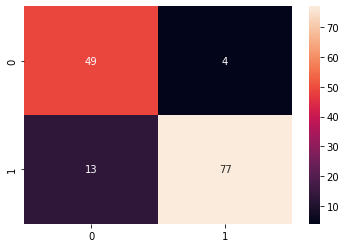

In [14]:

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        53
         1.0       0.95      0.86      0.90        90

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.89      0.88      0.88       143



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


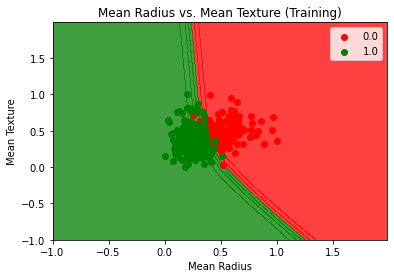

In [16]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [17]:
weights, biases = model.layers[0].get_weights()

In [18]:
weights

array([[-0.26560992, -0.6271692 , -0.1068356 ,  0.8358886 , -0.19064888,
        -0.38690162, -0.26483533,  0.4813522 ,  0.84940773,  0.6636997 ,
        -0.13898185,  0.08989757, -0.23793894,  0.12584323,  0.841198  ,
         0.87505984,  0.24016702,  0.41657317, -0.17380111,  0.7869457 ],
       [-0.45100737,  0.34933278, -0.31706232,  0.12021122, -0.0192638 ,
        -0.11923879,  0.48179412,  0.4067023 ,  0.73243755,  0.31657594,
        -0.39348793, -0.14871754, -0.10383353, -0.58113086,  0.25259   ,
        -0.02939301,  0.3977268 ,  0.28448957,  0.24919671,  0.19005044]],
      dtype=float32)

In [19]:
biases

array([ 0.        ,  0.3169304 ,  0.        , -0.12901762,  0.        ,
        0.        ,  0.28190145,  0.15499713,  0.32983318, -0.15108909,
        0.        , -0.04451331,  0.        ,  0.2390131 , -0.04884457,
       -0.08077866,  0.31514996, -0.09345125,  0.28432652, -0.14403166],
      dtype=float32)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


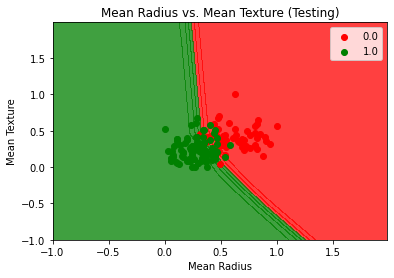

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()